In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [3]:
gender_submission = pd.read_csv('../../../datasets/titanic/gender_submission.csv');
test = pd.read_csv('../../../datasets/titanic/test.csv');
train = pd.read_csv('../../../datasets/titanic/train.csv');

In [4]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(f'Test Data : {len(test)}')
print(f'Train Data : {len(train)}')
print(f'Gender_Submission Data : {len(gender_submission)}')

Test Data : 418
Train Data : 891
Gender_Submission Data : 418


### Preprocessing

In [8]:
df = train
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
print(f'Records: {len(df)}')
print(f'Age null: {df.Age.isna().sum()}')
print(f'Age null: {df.Age.isna().sum()}')

Records: 891
Age null: 177
Age null: 177


In [10]:
df1 = df.copy()

In [11]:
df1.drop(columns=['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Embarked'], inplace=True)
df1

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500
...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000
887,888,1,1,female,19.0,30.0000
888,889,0,3,female,NaN,23.4500
889,890,1,1,male,26.0,30.0000


In [12]:
print(f'Records: {len(df1)}')
print(f'Age null: {df1.Age.isna().sum()}')
print(f'Sex null: {df1.Sex.isnull().sum()}')
print(f'Fare null: {df1.Fare.isna().sum()}')
print(f'Pclass null: {df1.Pclass.isna().sum()}')

Records: 891
Age null: 177
Sex null: 0
Fare null: 0
Pclass null: 0


In [13]:
df1.head(40)
df1.Age.mode()
df_age = df1['Age']

In [14]:
print(f"Mean: {df1['Age'].mean()}");
print(f"Median: {df1['Age'].median()}");
print(f"Mode: {df1['Age'].mode()}");

Mean: 29.69911764705882
Median: 28.0
Mode: 0    24.0
Name: Age, dtype: float64


In [15]:
df1['Age'] = df1.Age.fillna(df1.Age.median())

In [16]:
print(f"Mean: {df1['Age'].mean()}");
print(f"Median: {df1['Age'].median()}");
print(f"Mode: {df1['Age'].mode()}");
print(f'Records: {len(df1)}')
print(f'Age null: {df1.Age.isna().sum()}')
print(f'Sex null: {df1.Sex.isnull().sum()}')
print(f'Fare null: {df1.Fare.isna().sum()}')
print(f'Pclass null: {df1.Pclass.isna().sum()}')

Mean: 29.36158249158249
Median: 28.0
Mode: 0    28.0
Name: Age, dtype: float64
Records: 891
Age null: 0
Sex null: 0
Fare null: 0
Pclass null: 0


In [17]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df1['Sex_encoded'] = lb.fit_transform(df1['Sex'])

In [18]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Sex_encoded
0,1,0,3,male,22.0,7.2500,1
1,2,1,1,female,38.0,71.2833,0
2,3,1,3,female,26.0,7.9250,0
3,4,1,1,female,35.0,53.1000,0
4,5,0,3,male,35.0,8.0500,1


In [19]:
df1.drop(columns=['Sex'], inplace=True)

In [20]:
df1

,PassengerId,Survived,Pclass,Age,Fare,Sex_encoded
0,1,0,3,22.0,7.2500,1
1,2,1,1,38.0,71.2833,0
2,3,1,3,26.0,7.9250,0
3,4,1,1,35.0,53.1000,0
4,5,0,3,35.0,8.0500,1
...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,1
887,888,1,1,19.0,30.0000,0
888,889,0,3,28.0,23.4500,0
889,890,1,1,26.0,30.0000,1


In [21]:
df1.rename(columns={'Sex_encoded': 'Sex'}, inplace=True)

In [22]:
df1.head()

,PassengerId,Survived,Pclass,Age,Fare,Sex
0,1,0,3,22.0,7.2500,1
1,2,1,1,38.0,71.2833,0
2,3,1,3,26.0,7.9250,0
3,4,1,1,35.0,53.1000,0
4,5,0,3,35.0,8.0500,1


In [23]:
df1.drop(columns=['PassengerId'], inplace=True)

In [24]:
df1.head()

,Survived,Pclass,Age,Fare,Sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [26]:
# Allow TensorFlow to use only a fraction of GPU memory
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print(f"TensorFlow is using the following GPU(s): {physical_devices}")
        print("Memory growth is enabled.")
    except RuntimeError as e:
        print(e)

TensorFlow is using the following GPU(s): [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Memory growth is enabled.


In [27]:
from sklearn.model_selection import train_test_split
X = df1.drop(columns=['Survived'])
y = df1.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
from keras.optimizers import Adam

# Build a simple Sequential model
model = Sequential([
    Dense(128, input_dim=4, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

/Users/sanughosh/Documents/python-env/myenv3_11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-07 12:52:13.467854: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-11-07 12:52:13.467881: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-07 12:52:13.467888: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-07 12:52:13.467928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-07 12:52:13.467940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_fa

In [29]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5


2024-11-07 12:52:13.966912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5218 - loss: 1.5235
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6369 - loss: 0.6796
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6770 - loss: 0.6271
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6396 - loss: 0.6393
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6560 - loss: 0.6683


In [30]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7299 - loss: 0.5411
[0.5388950705528259, 0.726457417011261]
Loss =  0.5388950705528259
Accuracy =  0.726457417011261


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


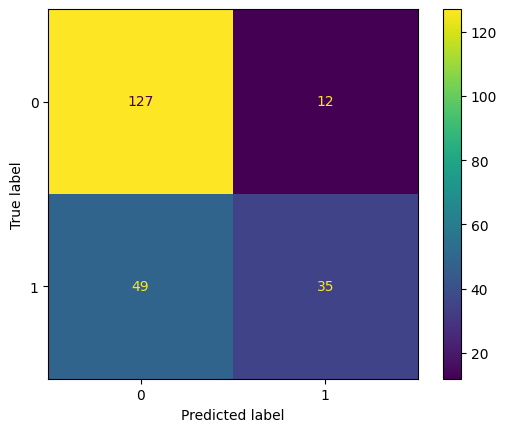

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted = model.predict(X_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(actual, predicted)

0.726457399103139

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [34]:
# Step 2: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators=100 specifies 100 trees

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
predicted = rf_model.predict(X_test)

# Step 4: Evaluate the model

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
conf_mat = confusion_matrix(y_test, predicted)
print(f'Confusion Matrix:\n{conf_mat}')

# Classification Report (includes precision, recall, F1-score)
class_report = classification_report(y_test, predicted)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8386
Confusion Matrix:
[[126  13]
 [ 23  61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       139
           1       0.82      0.73      0.77        84

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



In [36]:
df2 = test.copy()

In [37]:
df2.drop(columns=['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Embarked'], inplace=True)
df2

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,male,34.5,7.8292
1,893,3,female,47.0,7.0000
2,894,2,male,62.0,9.6875
3,895,3,male,27.0,8.6625
4,896,3,female,22.0,12.2875
...,...,...,...,...,...
413,1305,3,male,NaN,8.0500
414,1306,1,female,39.0,108.9000
415,1307,3,male,38.5,7.2500
416,1308,3,male,NaN,8.0500


In [38]:
df2.Age.isna().sum()

86

In [39]:
print(f"Mean: {df2['Age'].mean()}");
print(f"Median: {df2['Age'].median()}");
print(f"Mode: {df2['Age'].mode()}");
print(f'Records: {len(df2)}')
print(f'Age null: {df2.Age.isna().sum()}')
print(f'Sex null: {df2.Sex.isnull().sum()}')
print(f'Fare null: {df2.Fare.isna().sum()}')
print(f'Pclass null: {df2.Pclass.isna().sum()}')

Mean: 30.272590361445783
Median: 27.0
Mode: 0    21.0
1    24.0
Name: Age, dtype: float64
Records: 418
Age null: 86
Sex null: 0
Fare null: 1
Pclass null: 0


In [40]:
df2['Age'] = df2.Age.fillna(df2.Age.median())

In [41]:
print(f"Mean: {df2['Age'].mean()}");
print(f"Median: {df2['Age'].median()}");
print(f"Mode: {df2['Age'].mode()}");
print(f'Records: {len(df2)}')
print(f'Age null: {df2.Age.isna().sum()}')
print(f'Sex null: {df2.Sex.isnull().sum()}')
print(f'Fare null: {df2.Fare.isna().sum()}')
print(f'Pclass null: {df2.Pclass.isna().sum()}')

Mean: 29.599282296650717
Median: 27.0
Mode: 0    27.0
Name: Age, dtype: float64
Records: 418
Age null: 0
Sex null: 0
Fare null: 1
Pclass null: 0


In [42]:
df2[df2.Fare.isna()]

,PassengerId,Pclass,Sex,Age,Fare
152,1044,3,male,60.5,NaN


In [48]:
print(f"Mean : {df2[df2['Pclass'] == 3]['Fare'].mean()}")
print(f"Mode : {df2[df2['Pclass'] == 3]['Fare'].mode()}")
print(f"Median : {df2[df2['Pclass'] == 3]['Fare'].median()}")

Mean : 12.459677880184334
Mode : 0    7.75
Name: Fare, dtype: float64
Median : 7.8958


In [49]:
median_fare_pclass_3 = df2[df2['Pclass'] == 3]['Fare'].median()
median_fare_pclass_3

7.8958

In [50]:
df2['Fare'] = df2.Fare.fillna(median_fare_pclass_3)

In [51]:
print(f"Mean: {df2['Age'].mean()}");
print(f"Median: {df2['Age'].median()}");
print(f"Mode: {df2['Age'].mode()}");
print(f'Records: {len(df2)}')
print(f'Age null: {df2.Age.isna().sum()}')
print(f'Sex null: {df2.Sex.isnull().sum()}')
print(f'Fare null: {df2.Fare.isna().sum()}')
print(f'Pclass null: {df2.Pclass.isna().sum()}')

Mean: 29.599282296650717
Median: 27.0
Mode: 0    27.0
Name: Age, dtype: float64
Records: 418
Age null: 0
Sex null: 0
Fare null: 0
Pclass null: 0


In [53]:
df2['Sex_encoded'] = lb.fit_transform(df2['Sex'])
df2.drop(columns=['Sex'], inplace=True)
df2.rename(columns={'Sex_encoded': 'Sex'}, inplace=True)
df2.drop(columns=['PassengerId'], inplace=True)
df2

,Pclass,Age,Fare,Sex
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0
...,...,...,...,...
413,3,27.0,8.0500,1
414,1,39.0,108.9000,0
415,3,38.5,7.2500,1
416,3,27.0,8.0500,1


In [54]:
rf_model.predict(df2)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
submission_preds = rf_model.predict(df2)

In [56]:
passengerIds = test['PassengerId']
passengerIds

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [57]:
df3 = pd.DataFrame({
    "PassengerId": passengerIds.values,
    "Survived": submission_preds
})
df3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [58]:
df3.to_csv("submission.csv", index=False)